### Problem Statement : To predict weather passenger survived or not ###

***Using logistic Regression Model***

## IMPORT LIBRARIES 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Load data*

In [64]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Perform EDA**
*Removing the missing data*

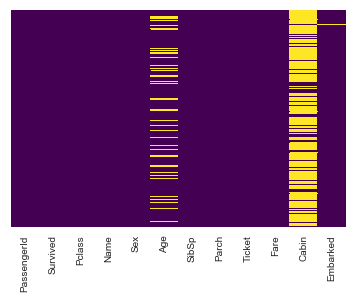

In [65]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

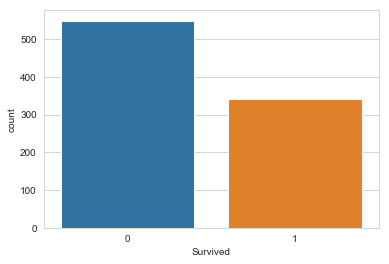

In [66]:
#checking for only people who survived
#getting 0 counts for non-survival 1 counts for survival
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

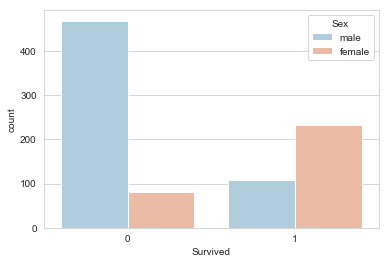

In [67]:
#checking wrt gender who survived
#double bar chart showing both male and female counts who didnt survived and who survived
sns.set_style('whitegrid')
sns.countplot(x = 'Survived' , hue = 'Sex' , palette = 'RdBu_r' , data = train)

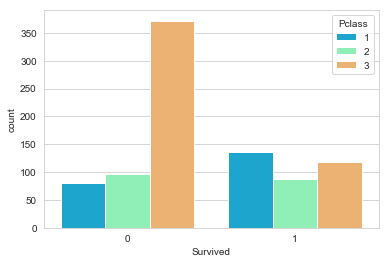

In [68]:
#checking wrt passenger class
sns.set_style('whitegrid')
sns.countplot( x = 'Survived', hue = 'Pclass', palette = 'rainbow', data = train )

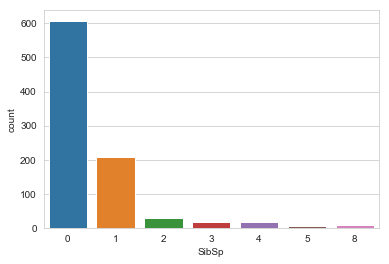

In [69]:
#check count of siblings and spouse
sns.countplot( x = 'SibSp', data = train )

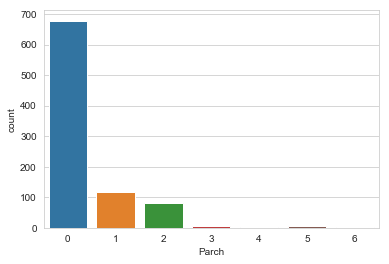

In [70]:
#check count of parents and children
sns.countplot( x = 'Parch' , data = train )

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


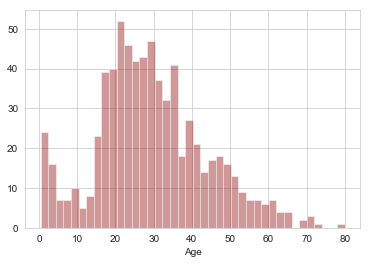

In [71]:
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

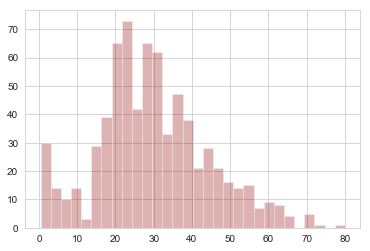

In [72]:
train['Age'].hist(bins = 30, color = 'darkred',alpha = 0.3)

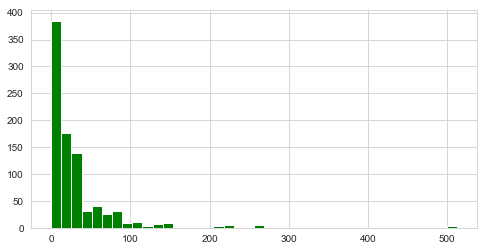

In [73]:
train['Fare'].hist(bins = 40 ,color = 'green', figsize = (8,4))

**DATA CLEANING**
*Since data was misssing from age column and cabin column. We fill the missing age based on passenger class*

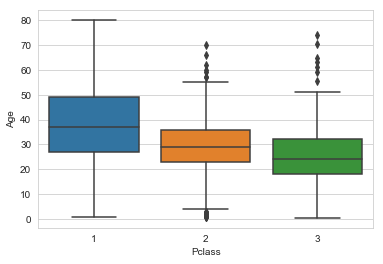

In [74]:
#from passenger class of 3 we find the average age of each passenger to fill
sns.boxplot( x = 'Pclass', y = 'Age',data = train)

In [75]:
#creating a function to fill the age in dataset
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [76]:
#implementing the function to fill
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

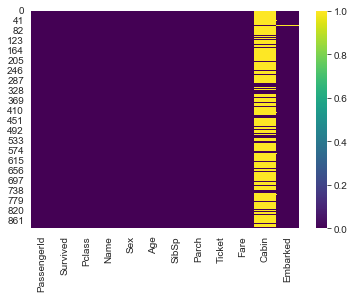

In [77]:
#check using heatmap the unfilled area
sns.heatmap(train.isnull(), cmap = 'viridis')

In [78]:
#here we can drop cabin column not required field and the rows of Embarked column since it does contain any numerical data
train.drop('Cabin', axis = 1, inplace = True)

In [79]:
train.dropna(inplace = True)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**CONVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES**

In [81]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [82]:
#usings pandas library get_dummies() to convert the categorical features to numerical feature 
#of 0 and 1 indicating presence and absence
pd.get_dummies(train['Embarked']).head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [83]:
pd.get_dummies(train['Sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [84]:
'''we can drop 1 column in Embarked field as if any 2 of the 3 is not present so it must be the 3rd one
same as in Sex field as any 1 of 2 will be on ship'''
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [85]:
#removing the fiels not required
train.drop(['Name','Ticket','Sex','Embarked'],axis = 1, inplace = True)

In [86]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [87]:
#adding the new numerical fields to the dataset
train = pd.concat([train,sex,embark],axis = 1)
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**BUILDING THE LINEAR REGRESSION MODEL**

*Creating the dataset to be matched with output survived dataset not updating*

In [88]:
train.drop('Survived',axis = 1).head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [89]:
train['Survived'].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

*Splitting dataset into train dataset and test dataset*

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1), 
                                                train['Survived'], 
                                                test_size = 30, 
                                                random_state = 101)

*TRAINING AND PREDICTING OF THE MODEL*

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
#making predictions using model
mLmodel = LogisticRegression()
mLmodel.fit(x_train,y_train)
predictions = mLmodel.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [94]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [95]:
#checking the accuracy of the model
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)
print(accuracy)

[[18  2]
 [ 1  9]]


In [96]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
print(score)

0.9


Hence, our ML model based on Logistic Regression by implementing it over titanic dataset it predicts 90% accurately the survival of the passenger